In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from lightgbm import LGBMRegressor
import joblib
import os

In [51]:
df = pd.read_excel('Датасет.xlsx')

In [35]:
def find_count(days, station):
    max_date = df['Date'].max()  
    start_date = max_date - pd.Timedelta(days=days)  
    start_index = df[df['Date'] == start_date].index
    count = df.loc[start_index, station].iloc[0]
    return count


## Preprocessing

In [52]:
def prep(data):
    data.fillna(df.mean(),inplace=True)
    data['day'] = data['Date'].dt.day
    data['weekday'] = (data['Date'].dt.dayofweek < 5).astype(int)
    data['weekend'] = (data['Date'].dt.dayofweek >= 5).astype(int)
    data['month'] = data['Date'].dt.month
    
    return data

In [53]:
df =prep(df)

In [54]:
df

Date  Бульвар Рокоссовского  Черкизовская  Преображенская пл  \
0  2024-01-01                  16671          6248              14094   
1  2024-01-02                  15113          5441               1132   
2  2024-01-03                   2905          7991               6556   
3  2024-01-04                  13998         14864               7265   
4  2024-01-05                  12742         10015               4001   
..        ...                    ...           ...                ...   
89 2024-03-30                  13714          6496               8365   
90 2024-03-31                   2561         15991               2811   
91 2024-04-01                  11209          7029               5004   
92 2024-04-02                   2722          3999              17068   
93 2024-04-03                   4835         15638              17117   

    Сокольники Сокольническая  Красносельская  Комсомольская Скольническая  \
0                       18651            7391                         8883   
1                       10083           19339                        15442   
2                        6488           15424                        15055   
3                        6409           10725                         2531   
4                        9446            5965                         7285   
..                        ...             ...                          ...   
89                      18759            7746                         5709   
90                       5573            8936                        15712   
91                      15017           11373                         5649   
92                      14176           19561                         4700   
93                       5465            1727                        15139   

    Красные ворота  Чистые пруды  Лубянка  ...  Пыхтино  Аэропорт Внуково  \
0             3067         12873     8554  ...     8390             15787   
1             7139         11038    15482  ...    16045             10257   
2            18002          2430     6545  ...    18903             13493   
3            19411         18152    10221  ...    13176              8656   
4             9990          7456     9020  ...    16827              5761   
..             ...           ...      ...  ...      ...               ...   
89            1873         15867     4428  ...    14040             19801   
90            2772         11590    10987  ...    10988             17569   
91           10104          4453     5127  ...     8035             13950   
92            3868         14364    15485  ...    11124              7545   
93           14189          8386    16436  ...     4290             14178   

    Яхромская  Лианозово  Физтех  Текстильщики БКЛ.1  day  weekday  weekend  \
0        9813      18978    1476               18055    1        1        0   
1       19663       8499    2893               18422    2        1        0   
2       12491       2959    9897               14815    3        1        0   
3        9180      12203    9793               16915    4        1        0   
4        3563       9070    9822                6052    5        1        0   
..        ...        ...     ...                 ...  ...      ...      ...   
89      14759       5616    3834               13438   30        0        1   
90      14798      16496    5997                7997   31        0        1   
91      17189       8603    5933               10796    1        1        0   
92       3864      16046    4969               11741    2        1        0   
93      12536       5489    5404                1741    3        1        0   

    month  
0       1  
1       1  
2       1  
3       1  
4       1  
..    ...  
89      3  
90      3  
91      4  
92      4  
93      4  

[94 rows x 323 columns]

## EDA

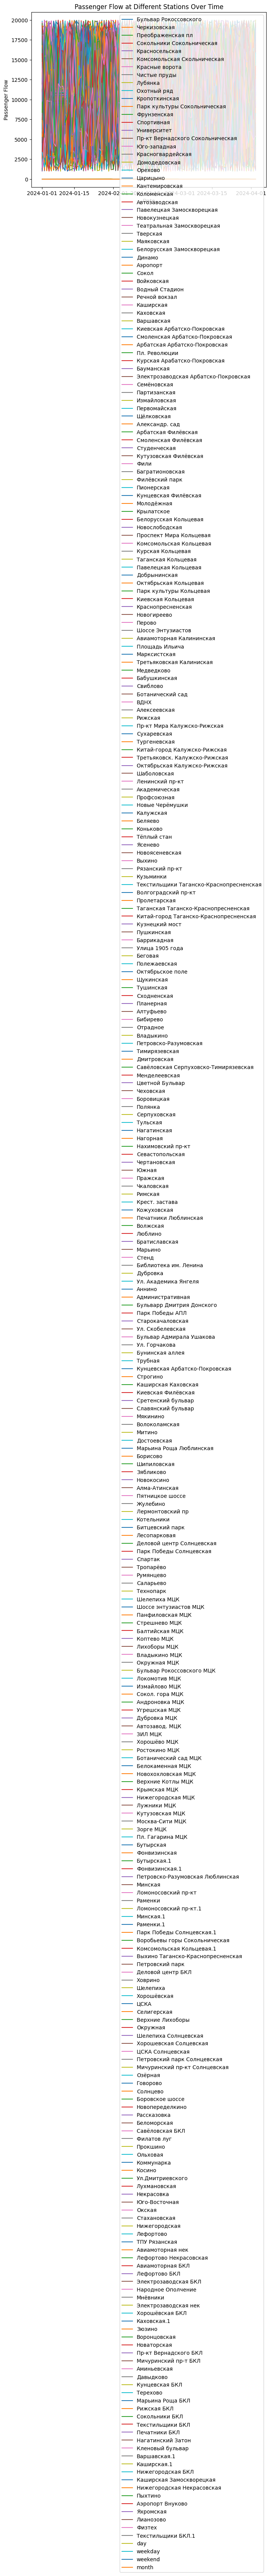

In [39]:
plt.figure(figsize=(8,6))
for station in df.columns[1:]:  # Начинаем с индекса 1, так как первый столбец содержит даты
    plt.plot(df['Date'], df[station], label=station)

# Добавляем подписи к осям и легенду
plt.xlabel('Date')
plt.ylabel('Passenger Flow')
plt.title('Passenger Flow at Different Stations Over Time')
plt.legend()

# Отображаем график
plt.show()


##  Train
`

### Времменные ряды

In [40]:
import matplotlib.pyplot as plt

# Создание подложки для графиков
fig, axes = plt.subplots(len(stations), figsize=(10, 4*len(stations)))

for i, station in enumerate(stations):
    # Разделение данных на обучающий и тестовый наборы
    train, test = data[station].iloc[:-30], data[station].iloc[-30:]

    # Создание и обучение модели SARIMA
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit()

    # Прогнозирование
    forecast = model_fit.forecast(30)

    # Получаем фактические и предсказанные значения
    pred = model_fit.get_prediction(start=test.index[0], end=test.index[-1], dynamic=False)

    # Построение графика сравнения предсказанных и фактических значений для текущей станции
    axes[i].plot(train.index, train, label='Train')
    axes[i].plot(test.index, test, label='Test')
    axes[i].plot(pred.predicted_mean.index, pred.predicted_mean, color='red', label='Predicted')
    axes[i].fill_between(pred.conf_int().index, pred.conf_int()['lower '+station], pred.conf_int()['upper '+station], color='pink', alpha=0.5)
    axes[i].set_title(f'Station: {station}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Passengers')
    axes[i].legend()

# Размещение графиков
plt.tight_layout()
plt.show()


NameError: name 'data' is not defined

Error in callback <function _draw_all_if_interactive at 0x000001F882C15D00> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 1000x128800 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1000x128800 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x128800 with 322 Axes>

### Линейка

MSE for Б.Рокоссовского: 40708119.19039013
MSE for Черкизовская: 43840522.02984037
MSE for Преображенск. пл: 27511759.98457713
MSE for Сокольники СЛ: 36633937.25502129


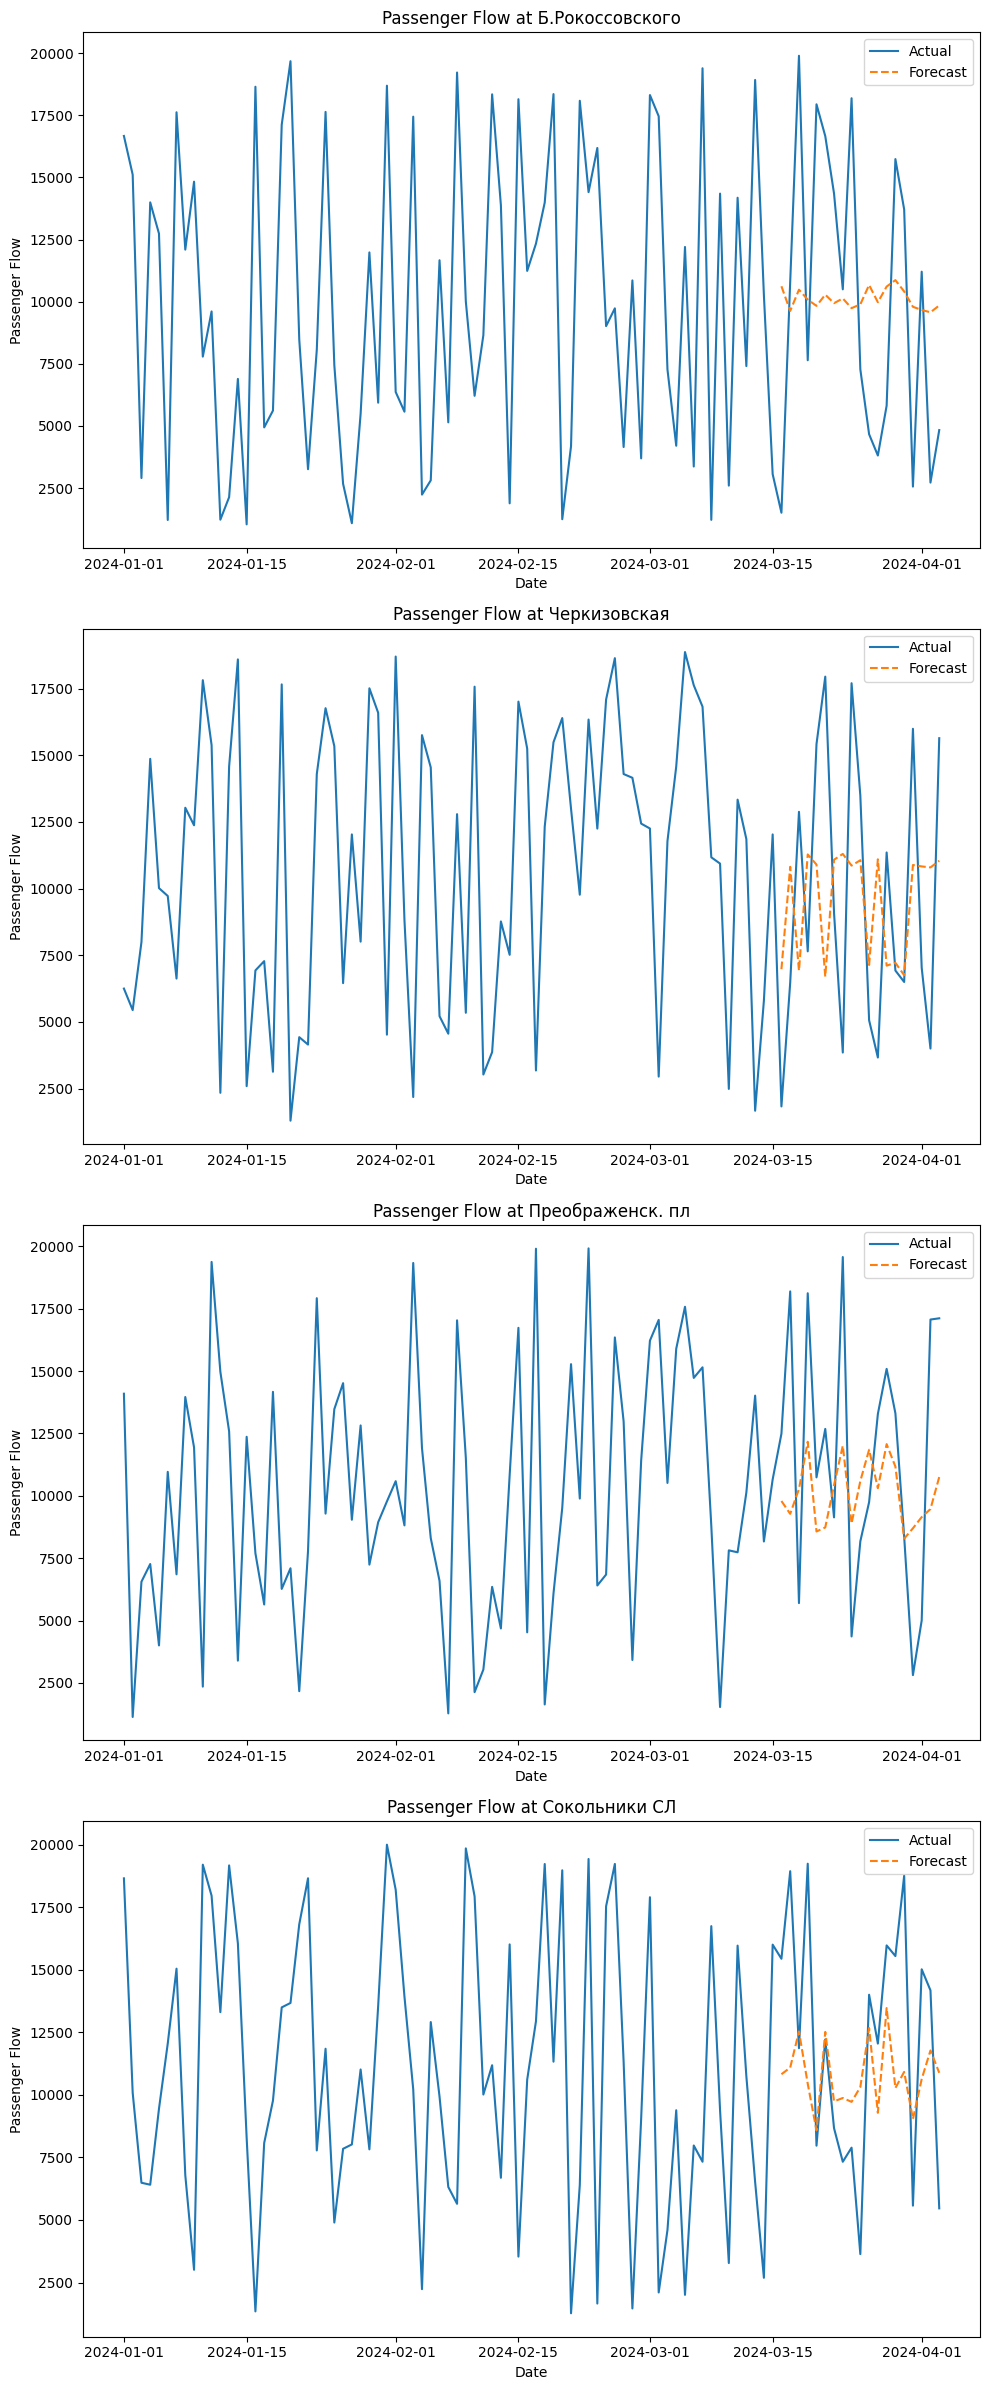

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

# Получаем список станций
stations = df.columns[1:5]  # Первый столбец содержит даты, поэтому начинаем с индекса 1

# Создаем фигуру для графиков
fig, axes = plt.subplots(len(stations), figsize=(10, 6*len(stations)))

# Перебираем каждую станцию
for i, station in enumerate(stations):
    # Разделение данных на признаки (X) и целевую переменную (y)
    X = df[['day','weekday','weekend','month']]  # Исключаем столбец с датами и текущую станцию
    y = df[station]

    # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Создание и обучение модели линейной регрессии
    model = LinearRegression()
    model.fit(X_train, y_train)


    # Прогнозирование на тестовом наборе
    y_pred = model.predict(X_test)

    # Вычисление MSE на тестовом наборе
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE for {station}: {mse}")

    # Построение графика фактических и предсказанных значений
    axes[i].plot(df['Date'], y, label='Actual')
    axes[i].plot(df['Date'][-len(y_pred):], y_pred, label='Forecast', linestyle='--')
    axes[i].set_title(f'Passenger Flow at {station}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Passenger Flow')
    axes[i].legend()

# Размещение графиков
plt.tight_layout()

plt.show()


In [ ]:
X_test

day  weekday  weekend
40   10        0        1
22   23        1        0
55   25        0        1
72   13        1        0
0     1        1        0
26   27        0        1
39    9        1        0
67    8        1        0
10   11        1        0
44   14        1        0
83   24        0        1
35    5        1        0
90   31        0        1
62    3        0        1
12   13        0        1
4     5        1        0
18   19        1        0
28   29        1        0
49   19        1        0

### Лес

MSE for Б.Рокоссовского: 57354478.425557904
MSE for Черкизовская: 45825815.44835789
MSE for Преображенск. пл: 37984822.266436845
MSE for Сокольники СЛ: 53953488.79760526


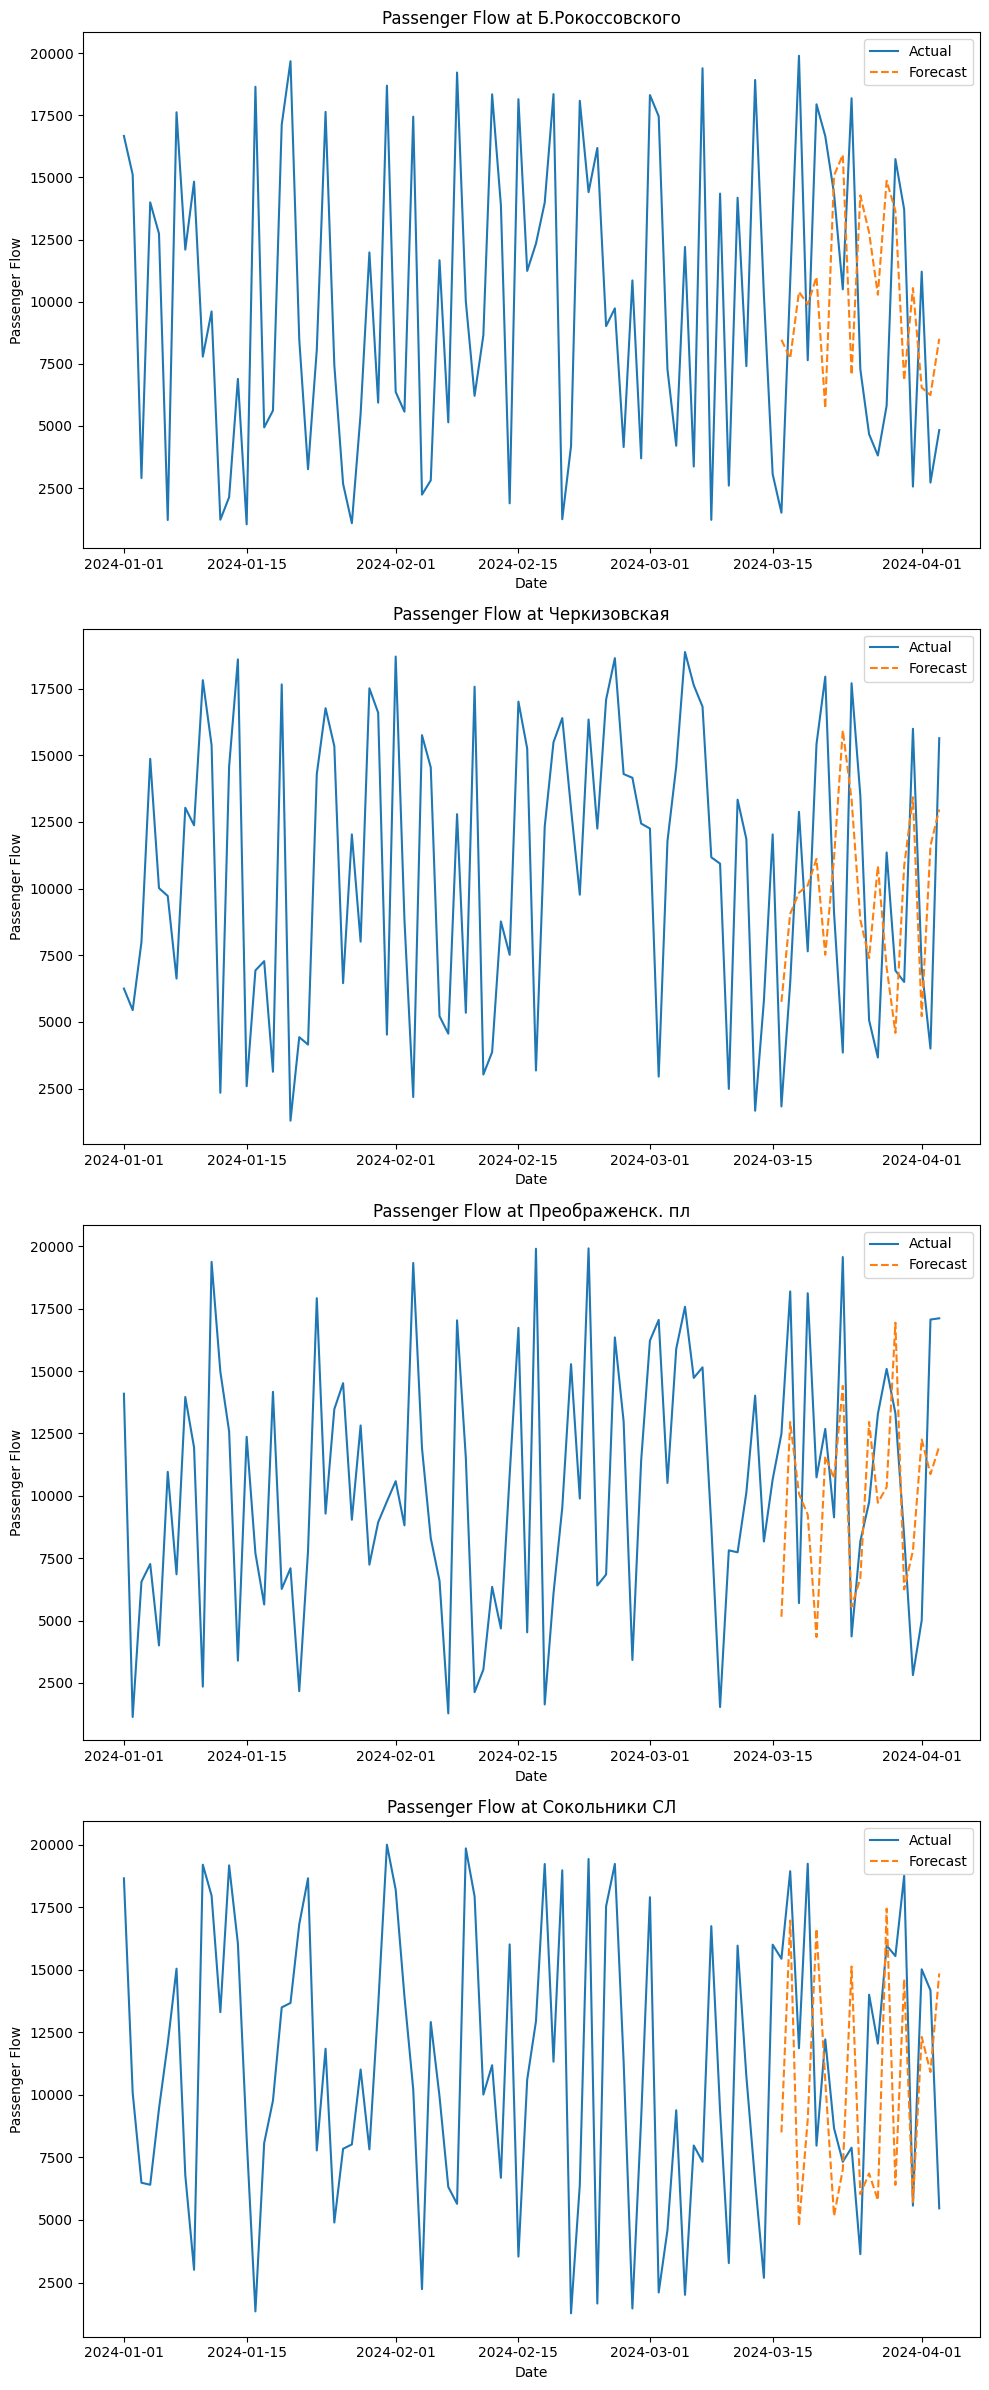

In [ ]:

from sklearn.ensemble import RandomForestRegressor

# Получаем список станций
stations = df.columns[1:5]  # Первый столбец содержит даты, поэтому начинаем с индекса 1

# Создаем фигуру для графиков
fig, axes = plt.subplots(len(stations), figsize=(10, 6*len(stations)))

# Перебираем каждую станцию
for i, station in enumerate(stations):
    # Разделение данных на признаки (X) и целевую переменную (y)
    X = df[['day','weekday','weekend','month']]  # Исключаем столбец с датами и текущую станцию
    y = df[station]

    # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Создание и обучение модели линейной регрессии
    model = RandomForestRegressor()
    model.fit(X_train, y_train)


    # Прогнозирование на тестовом наборе
    y_pred = model.predict(X_test)

    # Вычисление MSE на тестовом наборе
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE for {station}: {mse}")

    # Построение графика фактических и предсказанных значений
    axes[i].plot(df['Date'], y, label='Actual')
    axes[i].plot(df['Date'][-len(y_pred):], y_pred, label='Forecast', linestyle='--')
    axes[i].set_title(f'Passenger Flow at {station}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Passenger Flow')
    axes[i].legend()

# Размещение графиков
plt.tight_layout()

plt.show()


### Коты

Learning rate set to 0.027192
0:	learn: 5916.5647233	total: 512us	remaining: 512ms
1:	learn: 5901.9873571	total: 953us	remaining: 476ms
2:	learn: 5891.7887165	total: 1.32ms	remaining: 438ms
3:	learn: 5890.1527478	total: 1.57ms	remaining: 391ms
4:	learn: 5889.8356997	total: 1.7ms	remaining: 339ms
5:	learn: 5879.0094515	total: 2.01ms	remaining: 334ms
6:	learn: 5876.1747789	total: 2.19ms	remaining: 311ms
7:	learn: 5856.8521776	total: 2.48ms	remaining: 308ms
8:	learn: 5856.5709406	total: 2.6ms	remaining: 286ms
9:	learn: 5846.6522879	total: 2.84ms	remaining: 281ms
10:	learn: 5836.3937531	total: 3.15ms	remaining: 283ms
11:	learn: 5827.8005146	total: 3.42ms	remaining: 282ms
12:	learn: 5826.1886240	total: 3.56ms	remaining: 270ms
13:	learn: 5818.1883835	total: 3.86ms	remaining: 272ms
14:	learn: 5812.1144741	total: 4.08ms	remaining: 268ms
15:	learn: 5810.4781549	total: 4.3ms	remaining: 265ms
16:	learn: 5805.8841960	total: 4.62ms	remaining: 267ms
17:	learn: 5803.0034280	total: 4.89ms	remaining: 2

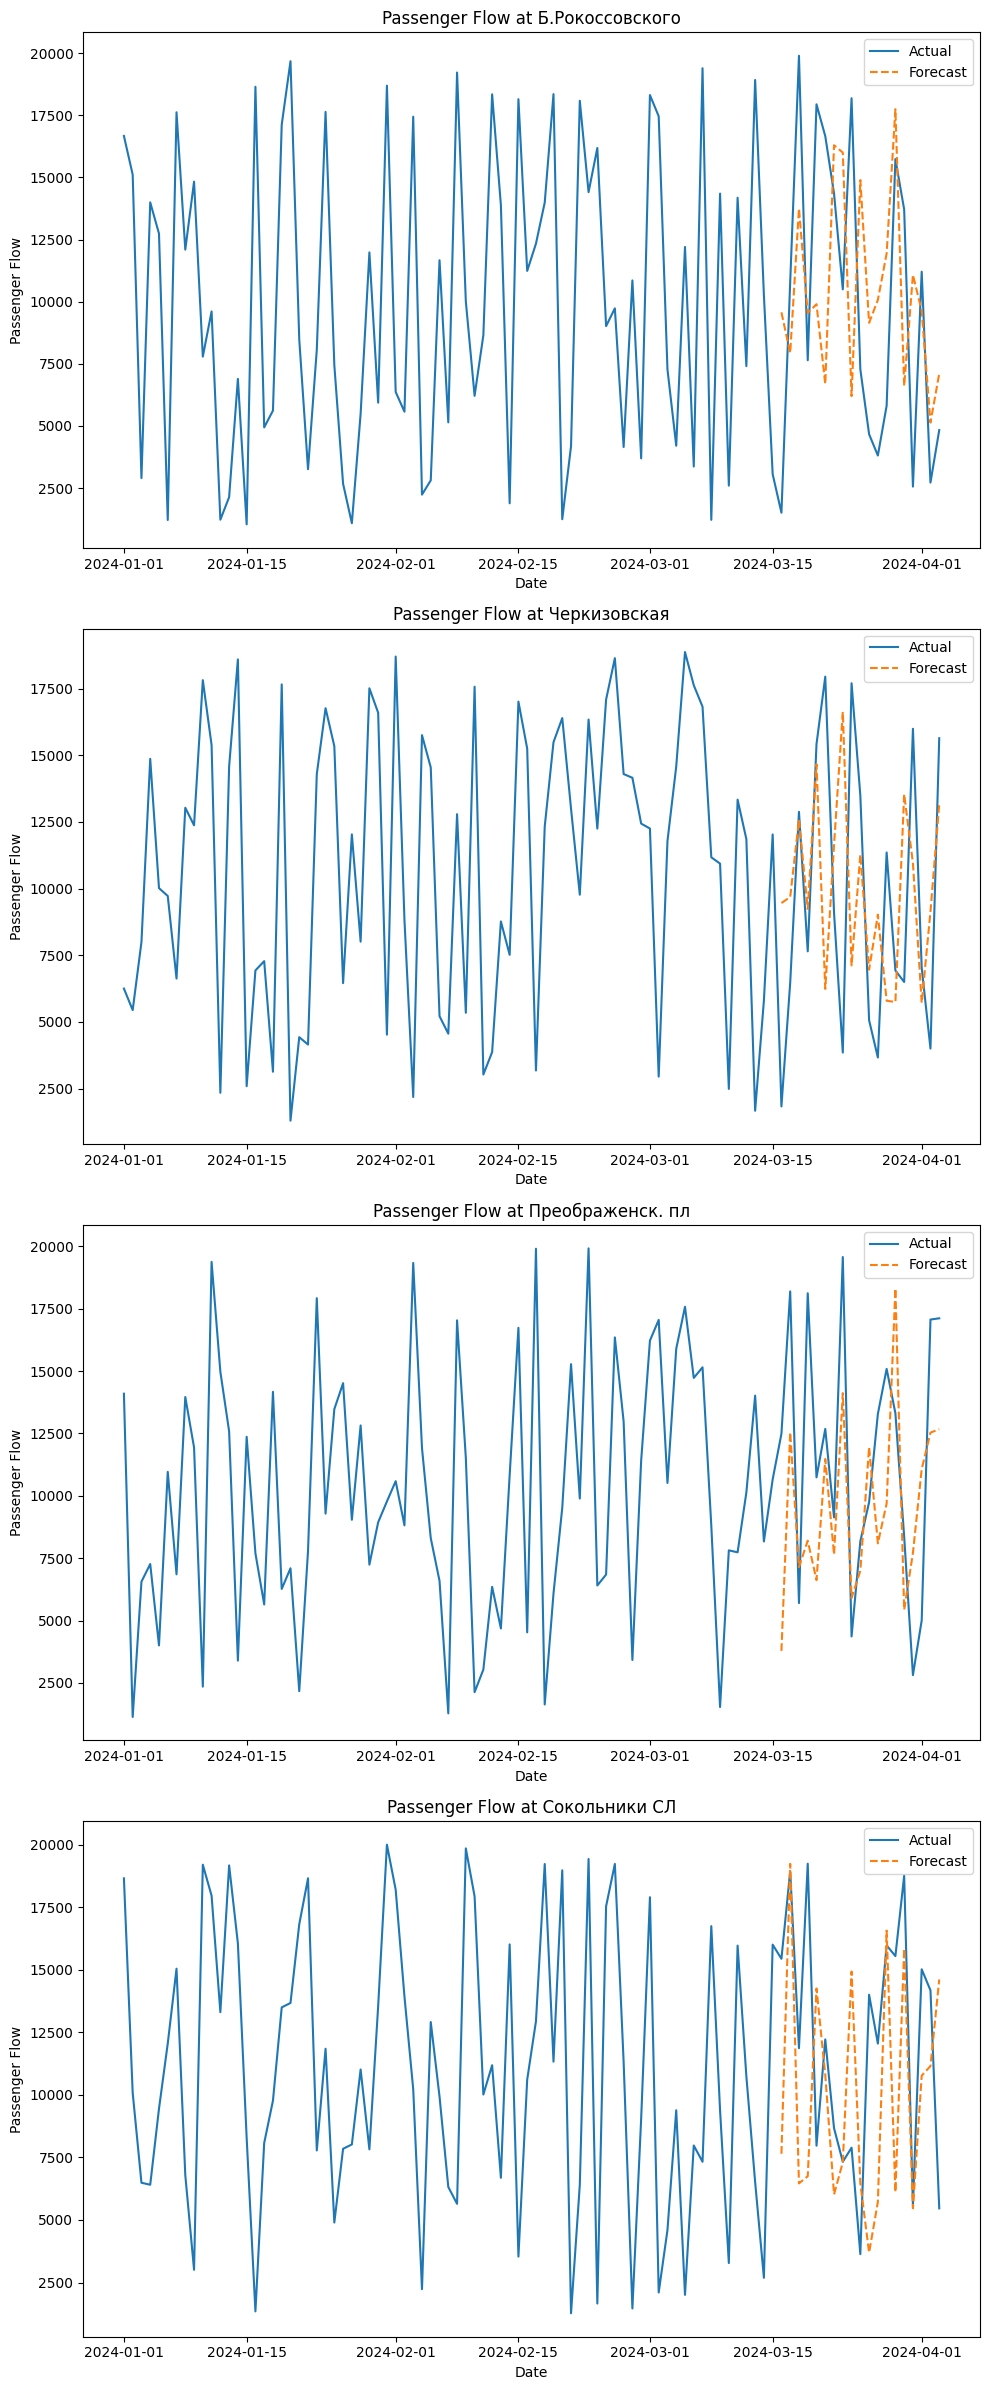

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Получаем список станций
stations = df.columns[1:5]  # Первый столбец содержит даты, поэтому начинаем с индекса 1

station_models={}
# Создаем фигуру для графиков
fig, axes = plt.subplots(len(stations), figsize=(10, 6*len(stations)))

# Перебираем каждую станцию
for i, station in enumerate(stations):
    # Разделение данных на признаки (X) и целевую переменную (y)
    X = df[['day','weekday','weekend','month']]  # Исключаем столбец с датами и текущую станцию
    y = df[station]

    # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Создание и обучение модели линейной регрессии
    model = CatBoostRegressor()
    model.fit(X_train, y_train)


    # Прогнозирование на тестовом наборе
    y_pred = model.predict(X_test)

    # Вычисление MSE на тестовом наборе
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE for {station}: {mse}")

    # Построение графика фактических и предсказанных значений
    axes[i].plot(df['Date'], y, label='Actual')
    axes[i].plot(df['Date'][-len(y_pred):], y_pred, label='Forecast', linestyle='--')
    axes[i].set_title(f'Passenger Flow at {station}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Passenger Flow')
    axes[i].legend()

    station_models[station] = model

# Размещение графиков
plt.tight_layout()

plt.show()


### XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Создаем словарь, где ключами будут названия станций, а значениями - обученные модели
station_models = {}

# Получаем список станций
stations = df.columns[1:5]  # Первый столбец содержит даты, поэтому начинаем с индекса 1

# Перебираем каждую станцию
for station in stations:
    # Разделение данных на признаки (X) и целевую переменную (y)
    X = df[['day_sequence','weekday','weekend']]  # Исключаем столбец с датами и текущую станцию
    y = df[station]

    # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Создание и обучение модели XGBoost для текущей станции
    model = XGBRegressor()
    model.fit(X_train, y_train)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"MAE for {station}: {mae}")

    # Построение графика фактических и предсказанных значений
    axes[i].plot(df['day_sequence'], y, label='Actual')
    axes[i].plot(df['day_sequence'][-len(y_pred):], y_pred, label='Forecast', linestyle='--')
    axes[i].set_title(f'Passenger Flow at {station}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Passenger Flow')
    axes[i].legend()
    # Сохранение модели в словаре
    #station_models[station] = model



MAE for Б.Рокоссовского: 6563.255097116573
MAE for Черкизовская: 4679.765154658558
MAE for Преображенск. пл: 4229.111360484181
MAE for Сокольники СЛ: 5910.712521137194


In [ ]:
for station in stations:
    # Разделение данных на признаки (X) и целевую переменную (y)
    X = df[['day','weekday','weekend','month']]  # Исключаем столбец с датами и текущую станцию
    y = df[station]

    # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Разделение данных на обучающий и тестовый наборы)
    print('-'*50)
    print(station)
    print("Линейка")
    model1 = LinearRegression()
    model1.fit(X_train,y_train)
    print(mean_absolute_percentage_error(y_test,model1.predict(X_test)))
    print("Лес")
    model2 = RandomForestRegressor()
    model2.fit(X_train,y_train)
    print(mean_absolute_percentage_error(y_test,model2.predict(X_test)))
    print("Коты")
    model3 = CatBoostRegressor(verbose=0)
    model3.fit(X_train,y_train)
    print(mean_absolute_percentage_error(y_test,model3.predict(X_test)))
    print("XGBoost")
    model4 = XGBRegressor()
    model4.fit(X_train,y_train)
    print(mean_absolute_percentage_error(y_test,model4.predict(X_test)))
    print("LightGB")
    model4 = LGBMRegressor()
    model4.fit(X_train,y_train)
    print(mean_absolute_percentage_error(y_test,model4.predict(X_test)))
    print('-'*50)

--------------------------------------------------
Б.Рокоссовского
Линейка
1.7762359957224447
Лес
1.996809424325838
Коты
2.058708100875671
XGBoost
2.2278327409096463
LightGB
1.7986109151379255
--------------------------------------------------
--------------------------------------------------
Черкизовская
Линейка
0.7213099699281947
Лес
0.6860583455846336
Коты
0.7225038390763135
XGBoost
0.7852261188898684
LightGB
0.5730494845855441
--------------------------------------------------
--------------------------------------------------
Преображенск. пл
Линейка
0.7648979935866523
Лес
0.7760695357292028
Коты
0.7029548464641389
XGBoost
0.6938633129268721
LightGB
0.8032837032901468
--------------------------------------------------
--------------------------------------------------
Сокольники СЛ
Линейка
0.49014206742672595
Лес
0.5164076138967084
Коты
0.5380743092248427
XGBoost
0.7070898863823231
LightGB
0.45651455393609086
--------------------------------------------------
--------------------

### LightGB

In [ ]:
df.columns[1:] 

Index(['Бульвар Рокоссовского', 'Черкизовская', 'Преображенская пл',
       'Сокольники Сокольническая', 'Красносельская',
       'Комсомольская Скольническая', 'Красные ворота', 'Чистые пруды',
       'Лубянка', 'Охотный ряд',
       ...
       'Нижегородская БКЛ', 'Каширская Замоскворецкая',
       'Нижегородская Некрасовская', 'К', 'Пыхтино', 'Аэропорт Внуково',
       'Яхромская', 'Лианозово', 'Физтех', 'Текстильщики БКЛ.1'],
      dtype='object', length=322)

In [55]:
from sklearn.model_selection import train_test_split
save_dir = 'models'

# Получаем список станций
stations = df.columns[1:]  # Первый столбец содержит даты, поэтому начинаем с индекса 1

station_models={}
# Создаем фигуру для графиков


# Перебираем каждую станцию
for i, station in enumerate(stations):
    # Разделение данных на признаки (X) и целевую переменную (y)
    X = df[['day','weekday','weekend','month']]  # Исключаем столбец с датами и текущую станцию
    y = df[station]

    # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Создание и обучение модели линейной регрессии
    model = LGBMRegressor()
    model.fit(X_train, y_train)


    # Прогнозирование на тестовом наборе
    #   y_pred = model.predict(X_test)

    # Вычисление MSE
    #  на тестовом наборе
    #mse = mean_absolute_percentage_error(y_test, y_pred)
    #print(f"MSE for {station}: {mse}")

    

    # Сохранение модели
     # Сохранение модели в папку
    filename = os.path.join(save_dir, f"{station}_model.joblib")
    joblib.dump(model, filename)

    # Добавление модели в словарь
    station_models[station] = filename

    # Добавление модели в словарь


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000017 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28
[LightGBM] [Info] Number of data points in the train set: 75, number of used features: 2
[LightGBM] [Info] Start training from score 10080.346667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [56]:
def find_future(days, station):
    # Загрузка моделей
    loaded_models = {}
    for station_name, filename in station_models.items():
        loaded_models[station_name] = joblib.load(filename)
    
    # Выбор соответствующей модели для станции
    model = loaded_models[station]
    
    # Генерация даты в будущем
    date = df['Date'].max() + pd.Timedelta(days=days)
    
    # Создание DataFrame для прогнозирования
    dat = pd.DataFrame({'Date': [date]})
    dat['day'] = dat['Date'].dt.day
    dat['weekday'] = (dat['Date'].dt.dayofweek < 5).astype(int)
    dat['weekend'] = (dat['Date'].dt.dayofweek >= 5).astype(int)
    dat['month'] = dat['Date'].dt.month
    
    # Прогнозирование и округление
    pred = model.predict(dat.iloc[:, 1:])
    prediction = int(round(pred[0]))
    
    return prediction, date


In [58]:
find_future(35,'Авиамоторная БКЛ')

(8925, Timestamp('2024-05-08 00:00:00'))